# Objectif :

- Comprendre du mieux possible nos données en vue de la prédiction d'une maladie cardiaque 


# Analyse de Forme :

- **variable target** : COEUR : maladie cardiaque 1 : Présence de la maladie, 0 : Absence de la maladie
- **Structure** : Le dataset contient 918 examples et 12 variables
- **types de variables** : qualitatives : 5, quantitatives : 7
- **Analyse des valeurs** : Aucune valeur nulle , aucune constante 


# Analyse de Fond :

## Analyse des features 2 à 2 : 

- **Cas des valeurs quantitatives** :

- **Cas des valeurs qualitatives** :

- **Test de corrélations**: Odds ratio (Rapport de chance ou risque relatif rapproché) ,  coeff de relation lineaire , risque de contingence ...

- **Analyse des variables vs la variable cible** : 

- **Autres tests** : 

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_excel('heart.xlsx')
data.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


## Présentation du dataset

In [19]:
print(f'Le dataset contient {data.shape[0]} examples et {data.shape[1]} variables')

Le dataset contient 918 examples et 12 variables


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [21]:
missing_rate = data.isna().sum()
missing_rate

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [28]:
data.rename(columns={'DEPRESSION ': 'DEPRESSION'}, inplace=True) # inplace modifie le data en laissant sa structure en <<en place>> dans le meme objet

0      0.0
1      1.0
2      0.0
3      1.5
4      0.0
      ... 
913    1.2
914    3.4
915    1.2
916    0.0
917    0.0
Name: DEPRESSION, Length: 918, dtype: float64

In [119]:
data.rename(columns={'CŒUR': 'COEUR'}, inplace=True) 

In [29]:
data.nunique() 

AGE             50
SEXE             2
TDT              4
PAR             67
CHOLESTEROL    222
GAJ              2
ECG              3
FCMAX          119
ANGINE           2
DEPRESSION      53
PENTE            3
CŒUR             2
dtype: int64

### Variables Quantitatives 

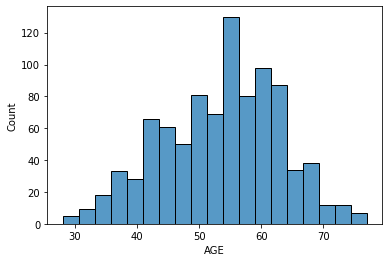

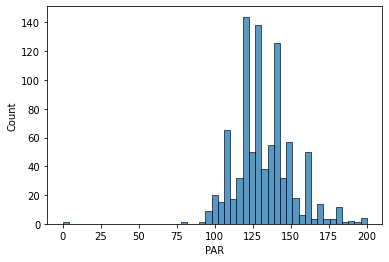

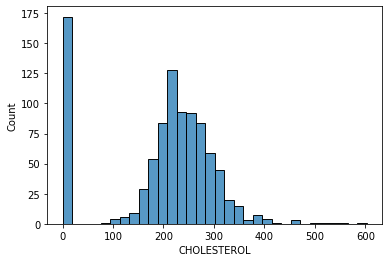

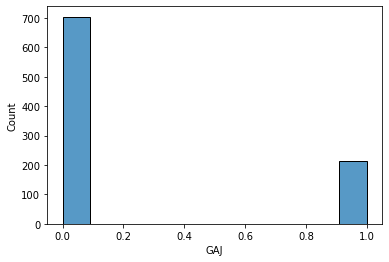

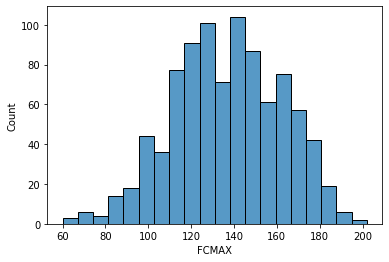

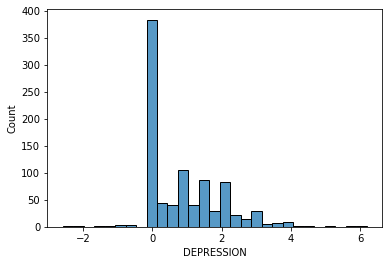

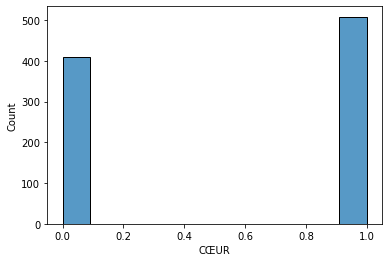

In [31]:
for col in data.select_dtypes(np.number):
    plt.figure()
    sns.histplot(data[col])

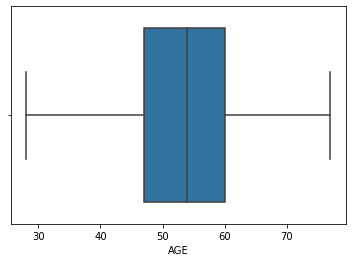

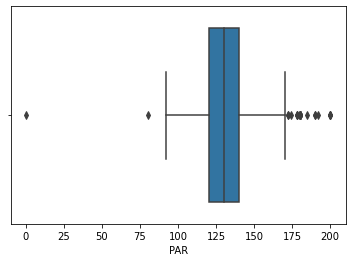

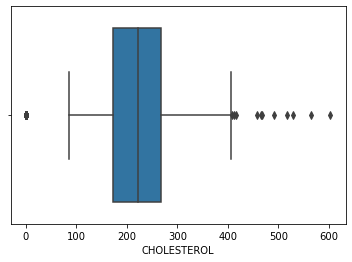

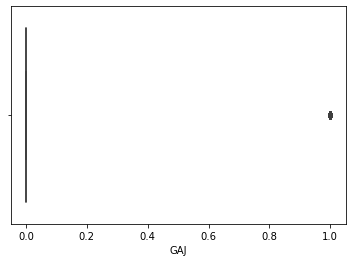

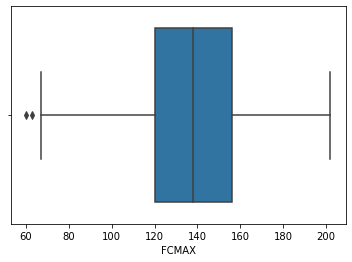

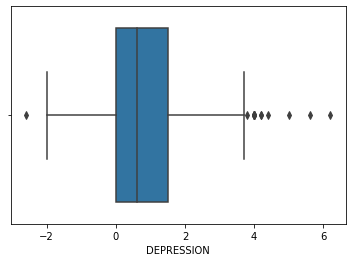

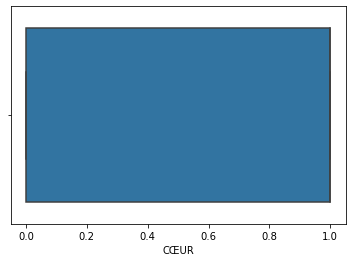

In [30]:
for col in data.select_dtypes(np.number):
    plt.figure()
    sns.boxplot(data[col])

### Variables qualitatives

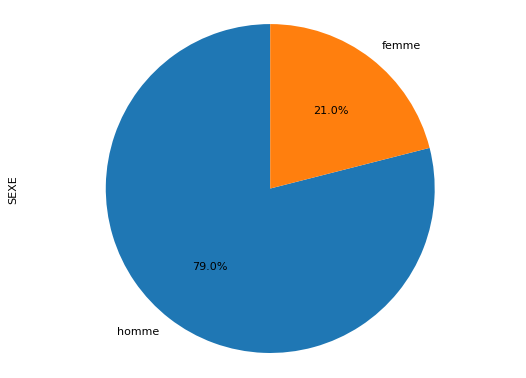

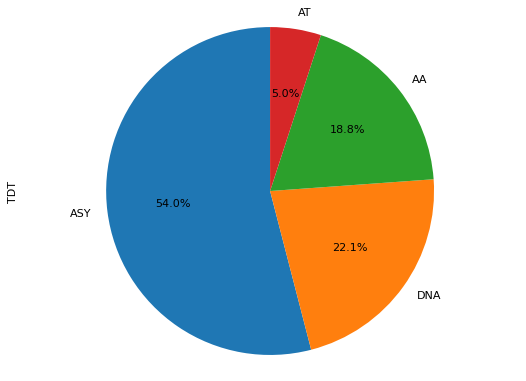

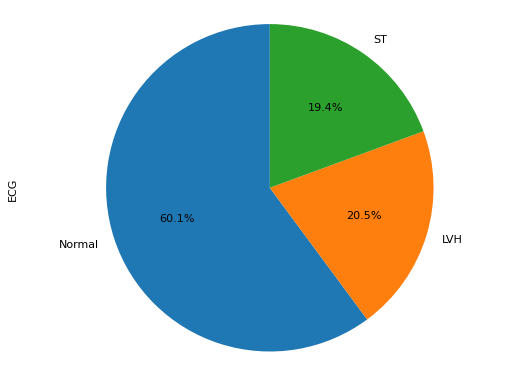

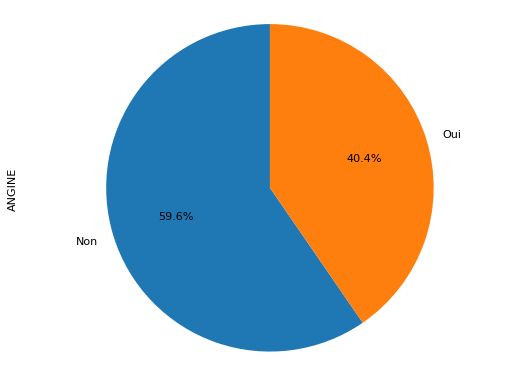

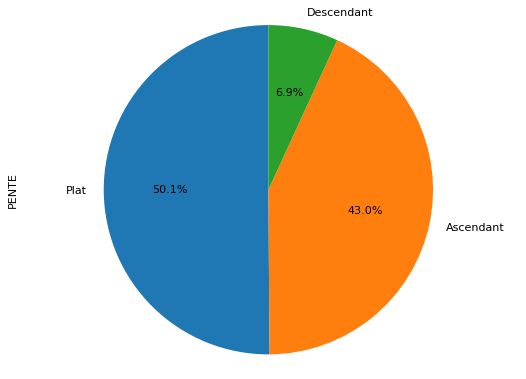

In [46]:
from matplotlib.pyplot import figure
for col_names in col :
    plt.figure(figsize=(8,6), dpi=80) 
    data[col_names].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.show()

### Analyse 2 à 2 des variables :

### Variable quantitative vs Variable quantitative

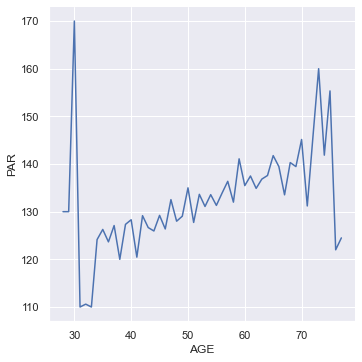

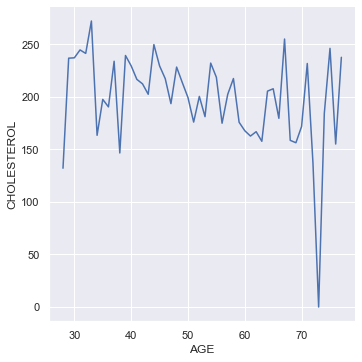

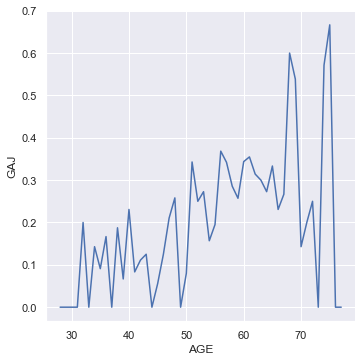

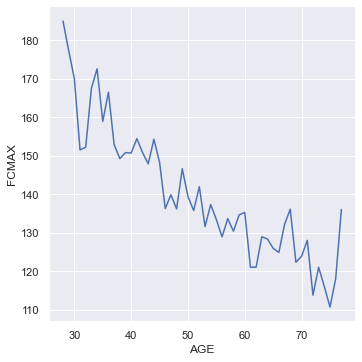

In [166]:
sns.relplot(x="AGE", y="PAR",kind="line", data=data , ci=None);
sns.relplot(x="AGE", y="CHOLESTEROL",kind="line", data=data , ci=None);
sns.relplot(x="AGE", y="GAJ",kind="line", data=data , ci=None);
sns.relplot(x="AGE", y="FCMAX",kind="line", data=data , ci=None);

In [153]:
import scipy.stats as st
import numpy as np

print(st.pearsonr(data["AGE"],data["PAR"])[0])
# print(np.cov(data["AGE"],data["PAR"],ddof=0)[1,0])

0.25439935615154474


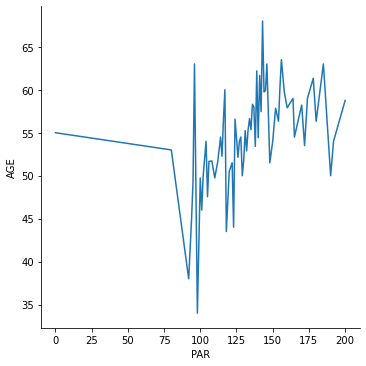

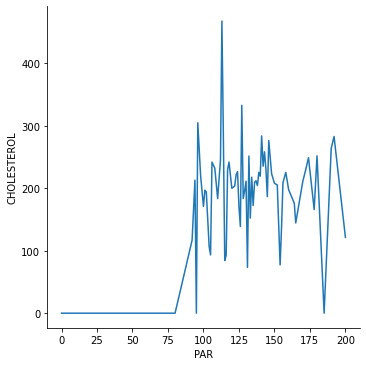

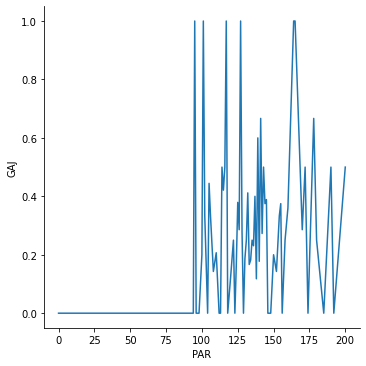

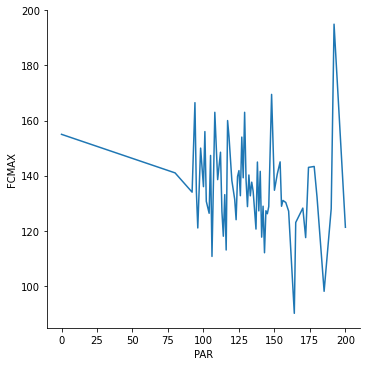

In [36]:
sns.relplot(x="PAR", y="AGE",kind="line", data=data , ci=None);
sns.relplot(x="PAR", y="CHOLESTEROL",kind="line", data=data , ci=None);
sns.relplot(x="PAR", y="GAJ",kind="line", data=data , ci=None);
sns.relplot(x="PAR", y="FCMAX",kind="line", data=data , ci=None);

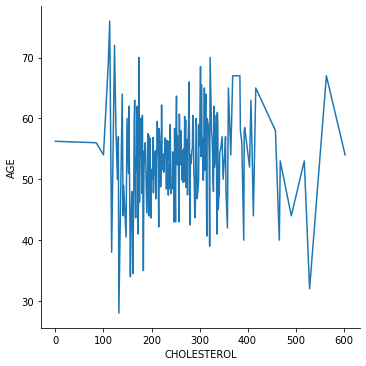

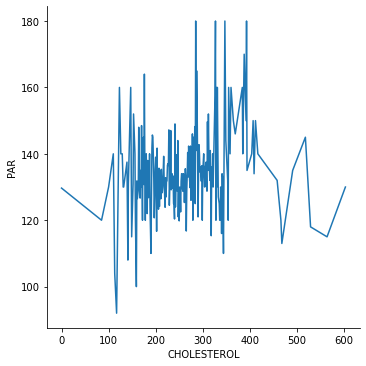

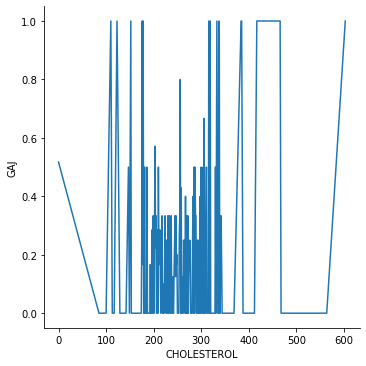

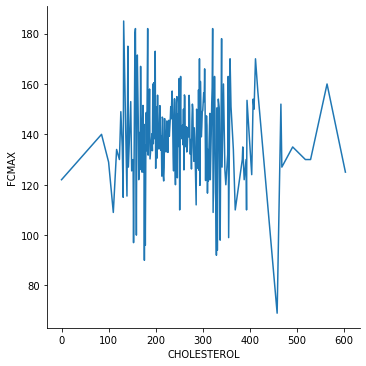

In [37]:
sns.relplot(x="CHOLESTEROL", y="AGE",kind="line", data=data , ci=None);
sns.relplot(x="CHOLESTEROL", y="PAR",kind="line", data=data , ci=None);
sns.relplot(x="CHOLESTEROL", y="GAJ",kind="line", data=data , ci=None);
sns.relplot(x="CHOLESTEROL", y="FCMAX",kind="line", data=data , ci=None);

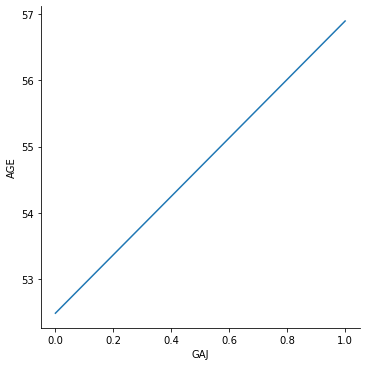

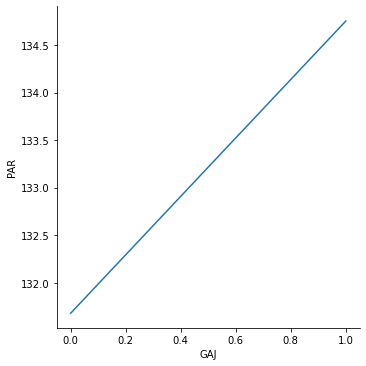

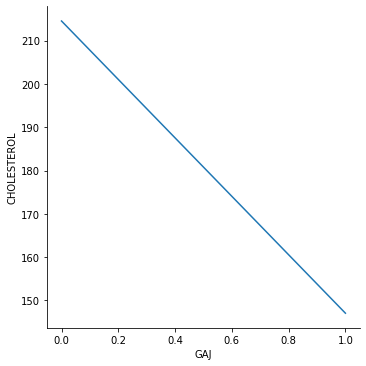

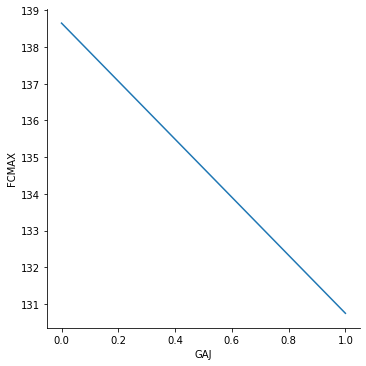

In [38]:
sns.relplot(x="GAJ", y="AGE",kind="line", data=data , ci=None);
sns.relplot(x="GAJ", y="PAR",kind="line", data=data , ci=None);
sns.relplot(x="GAJ", y="CHOLESTEROL",kind="line", data=data , ci=None);
sns.relplot(x="GAJ", y="FCMAX",kind="line", data=data , ci=None);

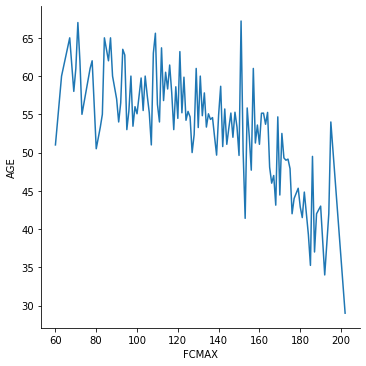

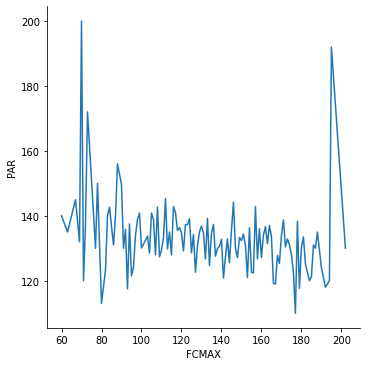

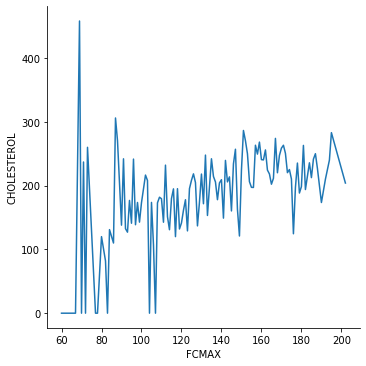

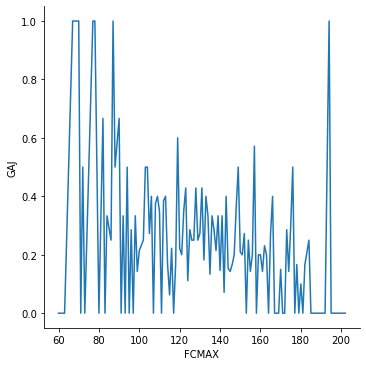

In [39]:
sns.relplot(x="FCMAX", y="AGE",kind="line", data=data , ci=None);
sns.relplot(x="FCMAX", y="PAR",kind="line", data=data , ci=None);
sns.relplot(x="FCMAX", y="CHOLESTEROL",kind="line", data=data , ci=None);
sns.relplot(x="FCMAX", y="GAJ",kind="line", data=data , ci=None);

In [155]:
from scipy.stats import pearsonr

In [156]:
pearsonr(data['AGE'],data['PAR'])

(0.25439935615154474, 5.0147697437822694e-15)

In [157]:
pearsonr(data['AGE'],data['CHOLESTEROL'])

(-0.09528177118121897, 0.0038580710435994576)

In [159]:
pearsonr(data['AGE'],data['GAJ'])

(0.1980390658667439, 1.4292211259812479e-09)

In [158]:
pearsonr(data['AGE'],data['FCMAX'])

(-0.3820446750319706, 2.8411217807772657e-33)

### Variables qualitatives VS Variables quantitatives

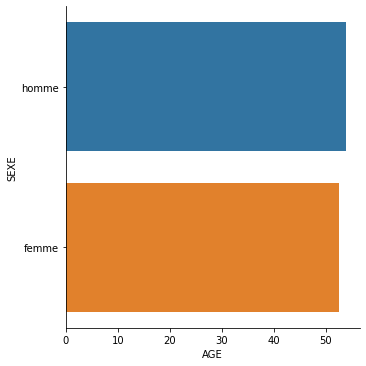

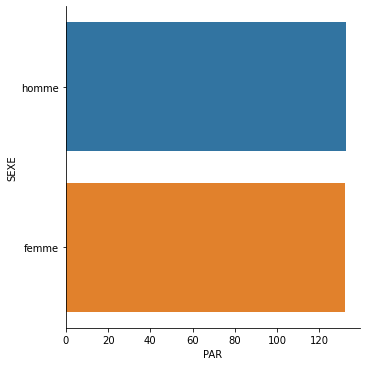

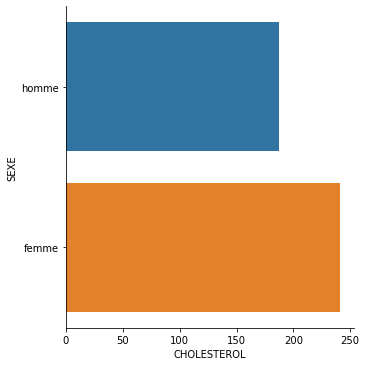

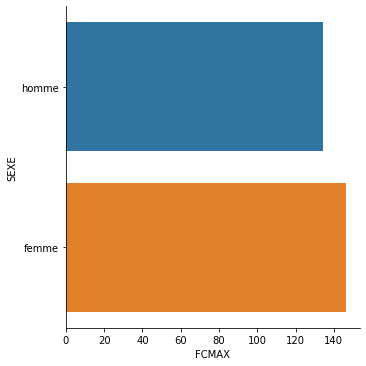

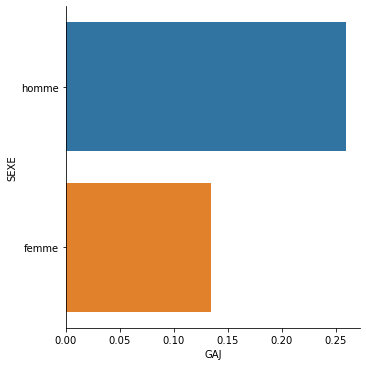

In [71]:
sns.catplot(x="AGE", y="SEXE", kind="bar", data=data, ci=None, orient= 'h')
sns.catplot(x="PAR", y="SEXE", kind="bar", data=data, ci=None)
sns.catplot(x="CHOLESTEROL", y="SEXE", kind="bar", data=data, ci=None)
sns.catplot(x="FCMAX", y="SEXE", kind="bar", data=data, ci=None)
sns.catplot(x="GAJ", y="SEXE", kind="bar", data=data, ci=None)
plt.show()

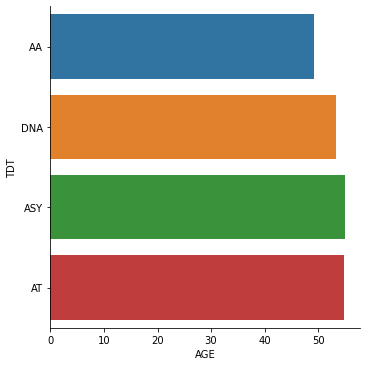

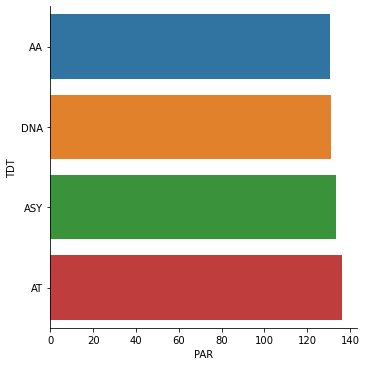

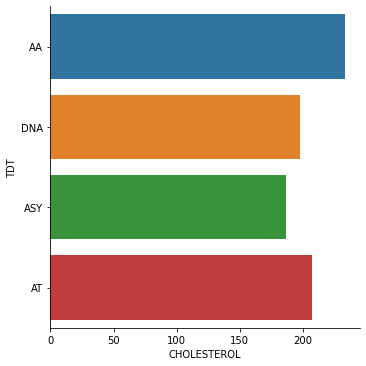

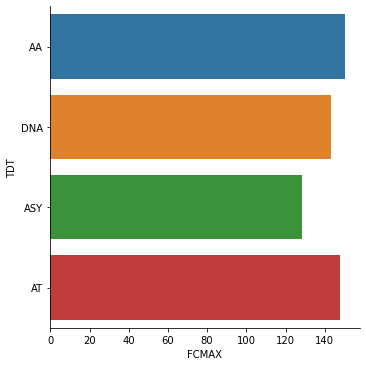

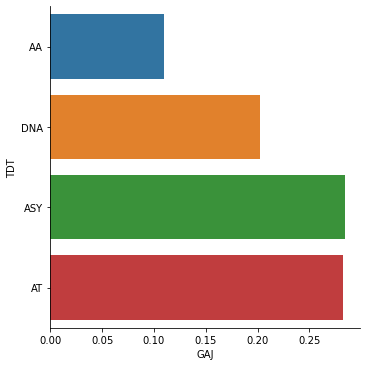

In [67]:
sns.catplot(x="AGE", y="TDT", kind="bar", data=data, ci=None)
sns.catplot(x="PAR", y="TDT", kind="bar", data=data, ci=None)
sns.catplot(x="CHOLESTEROL", y="TDT", kind="bar", data=data, ci=None)
sns.catplot(x="FCMAX", y="TDT", kind="bar", data=data, ci=None)
sns.catplot(x="GAJ", y="TDT", kind="bar", data=data, ci=None)
plt.show()

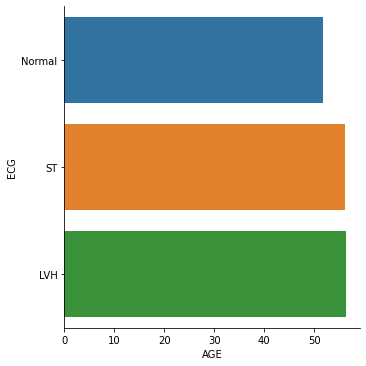

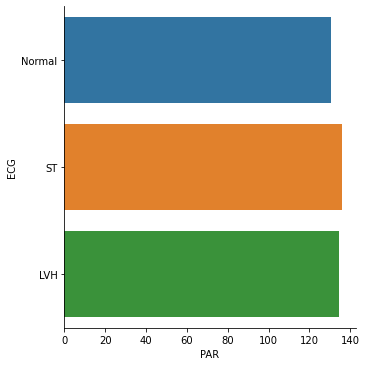

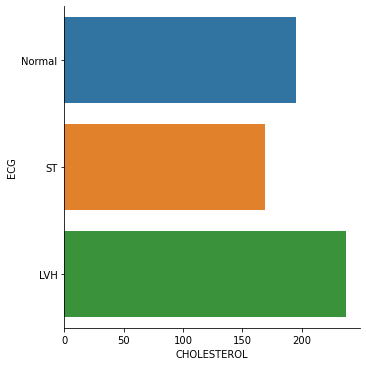

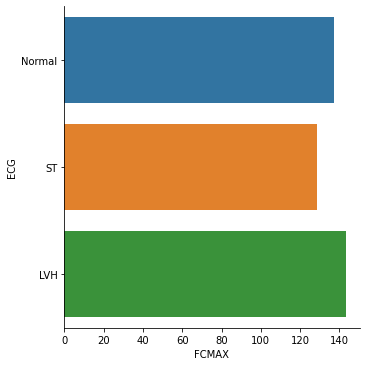

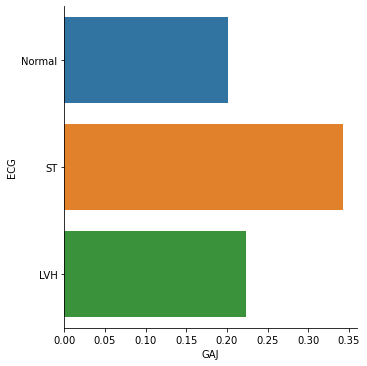

In [72]:
sns.catplot(x="AGE", y="ECG", kind="bar", data=data, ci=None)
sns.catplot(x="PAR", y="ECG", kind="bar", data=data, ci=None)
sns.catplot(x="CHOLESTEROL", y="ECG", kind="bar", data=data, ci=None)
sns.catplot(x="FCMAX", y="ECG", kind="bar", data=data, ci=None)
sns.catplot(x="GAJ", y="ECG", kind="bar", data=data, ci=None)
plt.show()

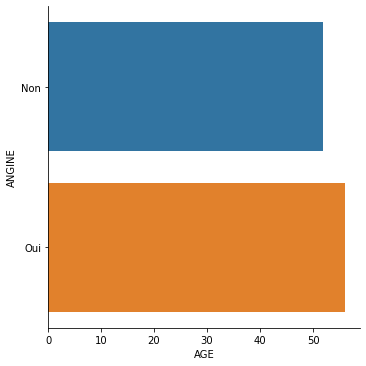

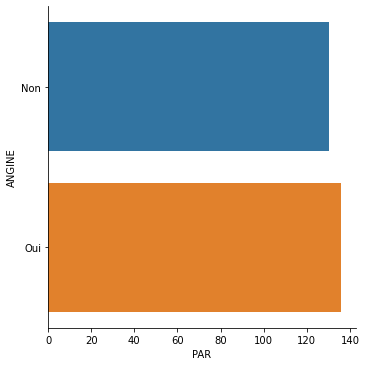

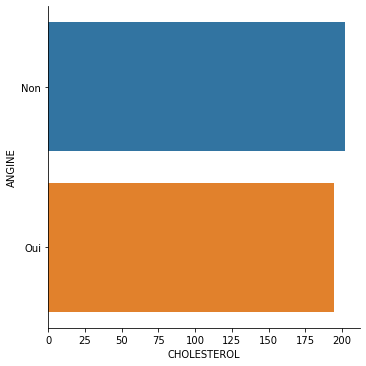

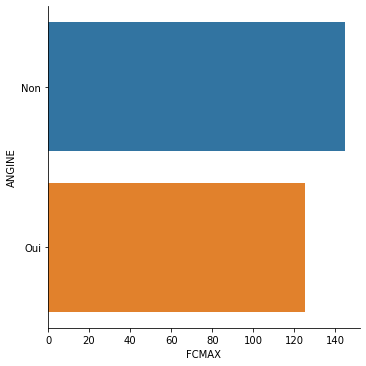

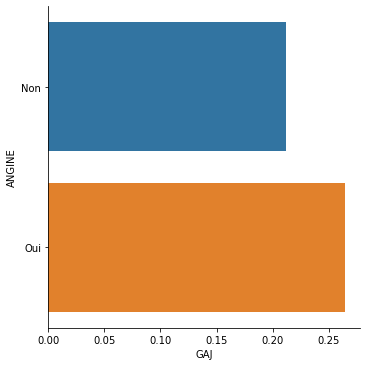

In [73]:
sns.catplot(x="AGE", y="ANGINE", kind="bar", data=data, ci=None)
sns.catplot(x="PAR", y="ANGINE", kind="bar", data=data, ci=None)
sns.catplot(x="CHOLESTEROL", y="ANGINE", kind="bar", data=data, ci=None)
sns.catplot(x="FCMAX", y="ANGINE", kind="bar", data=data, ci=None)
sns.catplot(x="GAJ", y="ANGINE", kind="bar", data=data, ci=None)
plt.show()

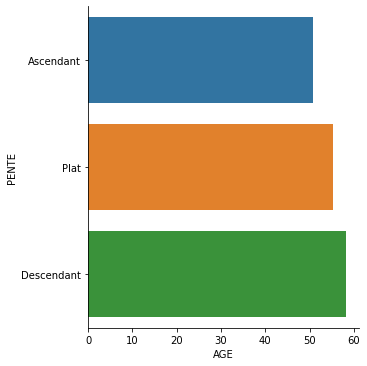

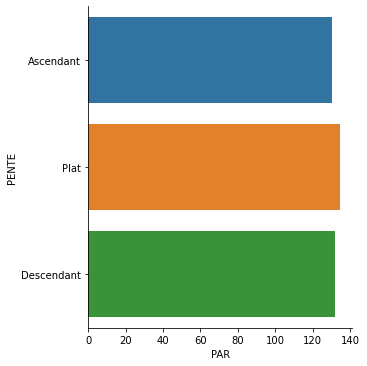

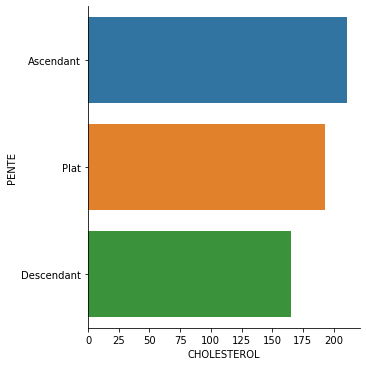

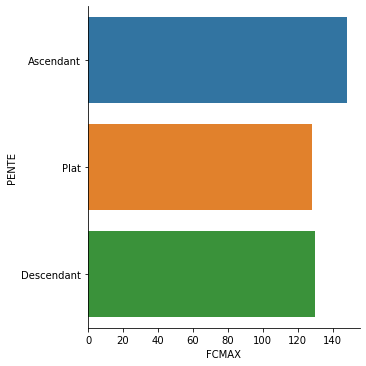

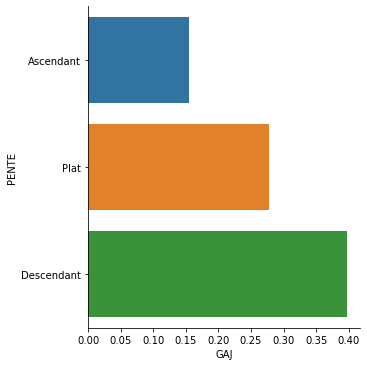

In [74]:
sns.catplot(x="AGE", y="PENTE", kind="bar", data=data, ci=None)
sns.catplot(x="PAR", y="PENTE", kind="bar", data=data, ci=None)
sns.catplot(x="CHOLESTEROL", y="PENTE", kind="bar", data=data, ci=None)
sns.catplot(x="FCMAX", y="PENTE", kind="bar", data=data, ci=None)
sns.catplot(x="GAJ", y="PENTE", kind="bar", data=data, ci=None)
plt.show()

Le graphique à colonnes empilées est un graphique utile pour visualiser la relation entre deux variables catégorielles. Il compare le pourcentage de contribution de chaque catégorie d'une variable à un total entre les catégories de la deuxième variable.

## TESTS STATISTIQUES : VARIABLES QUALITATIVES

In [78]:
import scipy.stats as st

In [77]:
X = "SEXE"
Y = "TDT"
cont = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont

TDT,AA,ASY,AT,DNA
SEXE,,,,
femme,60,70,10,53
homme,113,426,36,150


In [79]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

In [80]:
st_chi2

36.87917751378357

C'est ce nombre de degrés de liberté qui sera utilisé par scipy.stats pour calculer la loi suivie et donc calculer la p-value

In [81]:
st_dof

3

**P-Value**

Cette valeur nous permet de décider si deux variables sont indépendantes ou non en se fixant un seuil de décision.

Scipy.stats calcule lui-même le nombre de degrés de liberté à partir du tableau de contingence. Cela permet ensuite de calculer la pvaleur, en "observant" la courbe de densité de la loi du khi2 à k degrés de liberté.

L'hypothèse H0 est que les variables sont indépendantes entre elles

In [82]:
st_p

4.880336281360552e-08

Nous pouvons rejeter H0. On rejette donc l'indépendance des deux variables.

In [88]:
X = "SEXE"
Y = "ECG"
cont2 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont2

ECG,LVH,Normal,ST
SEXE,,,
femme,47,118,28
homme,141,434,150


In [90]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont2)
print(st_chi2)
print(st_p)

4.835488217351421
0.08912244139807841


Nous pouvons accepter H0. On accepte donc l'indépendance des deux variables.

In [91]:
X = "SEXE"
Y = "ANGINE"
cont3 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont3

ANGINE,Non,Oui
SEXE,,
femme,150,43
homme,397,328


In [93]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont3)
print(st_chi2)
print(st_p)

32.42516960570875
1.2387163558796499e-08


Nous pouvons rejeter H0. On rejette donc l'indépendance des deux variables.

In [95]:
X = "SEXE"
Y = "PENTE"
cont4 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont4

PENTE,Ascendant,Descendant,Plat
SEXE,,,
femme,111,7,75
homme,284,56,385


In [96]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont4)
print(st_chi2)
print(st_p)

21.815310184744973
1.83174739624214e-05


Nous pouvons rejeter H0. On rejette donc l'indépendance des deux variables.

In [121]:
X = "ECG"
Y = "TDT"
cont5 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont5)
print(st_chi2)
print(st_p)

19.360106674257352
0.003596780905759451


Nous pouvons rejeter H0. On rejette donc l'indépendance des deux variables.

In [125]:
X = "ANGINE"
Y = "TDT"
cont6 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont6)
print(st_chi2)
print(st_p)

179.27327764596896
1.2659099121635848e-38


Nous pouvons rejeter H0. On rejette donc l'indépendance des deux variables.

In [126]:
X = "PENTE"
Y = "TDT"
cont7 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont7)
print(st_chi2)
print(st_p)

156.88391948842818
2.705381063690865e-31


Nous pouvons rejeter H0. On rejette donc l'indépendance des deux variables.

In [127]:
X = "ANGINE"
Y = "ECG"
cont8 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont8)
print(st_chi2)
print(st_p)

10.620317923311472
0.004941141203261243


Nous pouvons rejeter H0. On rejette donc l'indépendance des deux variables.

In [128]:
X = "PENTE"
Y = "ECG"
cont8 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont8)
print(st_chi2)
print(st_p)

7.697833028770749
0.10329552404263315


Nous pouvons accepter H0. On accepte donc l'indépendance des deux variables.

In [143]:
X = "ANGINE"
Y = "PENTE"
cont9 = data[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).copy().astype(int)
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont9)
print(st_chi2)
print(st_p)

191.42852964558256
2.70285624656344e-42


Nous pouvons accepter H0. On accepte donc l'indépendance des deux variables.

### COMPARAISON AVEC LA VARIABLE CIBLE COEUR 

In [149]:
from scipy.stats import chi2_contingency 

In [150]:
for col in data.select_dtypes(object):
    if col not in 'COEUR':
        matrice=pd.crosstab(data['COEUR'],data[col])
        khi2, pval, ddl, contingent_theorique = chi2_contingency(matrice)
        print(matrice)
        print(pval)
        print('')
        print('')

SEXE   femme  homme
COEUR              
0        143    267
1         50    458
4.597617450809164e-20


TDT     AA  ASY  AT  DNA
COEUR                   
0      149  104  26  131
1       24  392  20   72
8.08372842808765e-58


ECG    LVH  Normal   ST
COEUR                  
0       82     267   61
1      106     285  117
0.0042292328167544925


ANGINE  Non  Oui
COEUR           
0       355   55
1       192  316
2.907808387659878e-50


PENTE  Ascendant  Descendant  Plat
COEUR                             
0            317          14    79
1             78          49   381
5.167637689470128e-78




Les variables PENTE , ANGINE , TDT , SEXE sont liées à la variable cible 

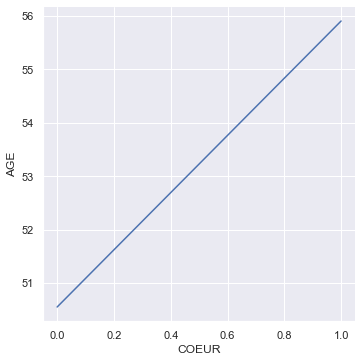

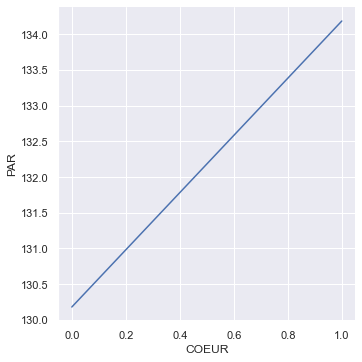

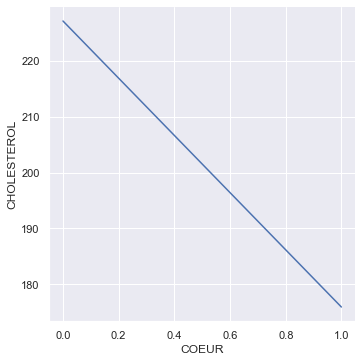

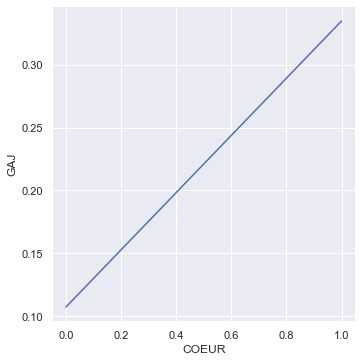

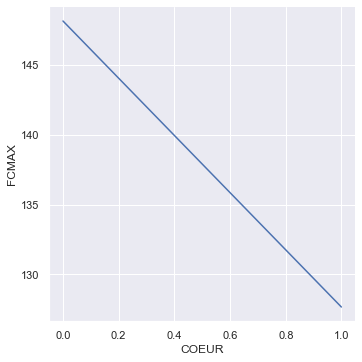

In [170]:
sns.relplot(x="COEUR", y="AGE",kind='line', data=data, ci=None);
sns.relplot(x="COEUR", y="PAR",kind='line', data=data, ci=None);
sns.relplot(x="COEUR", y="CHOLESTEROL",kind='line', data=data, ci=None);
sns.relplot(x="COEUR", y="GAJ",kind='line', data=data, ci=None);
sns.relplot(x="COEUR", y="FCMAX",kind='line', data=data, ci=None);

In [171]:
pearsonr(data['COEUR'],data['AGE'])

(0.28203850581899687, 3.007953240047636e-18)

In [172]:
pearsonr(data['COEUR'],data['PAR'])

(0.10758898037140391, 0.001095314585171513)

In [173]:
pearsonr(data['COEUR'],data['CHOLESTEROL'])

(-0.23274063892701108, 9.308308883526296e-13)

In [174]:
pearsonr(data['COEUR'],data['GAJ'])

(0.2672911861102979, 1.7535980103286795e-16)

In [175]:
pearsonr(data['COEUR'],data['FCMAX'])

(-0.4004207694631897, 1.1377859840272116e-36)

Les variables FCMAX , GAJ , CHOLESTEROL , AGE sont liées à la variable cible 